## Lamporta loģisko pulksteņu shēmas izveide Python programmēšanas valodā

Pirms veidojam loģiskā pulksteņa shēmu, ir nepieciešams importēt "lamport" bibliotēku.

In [21]:
import lamport

Pēc importēšanas mums ir pieejama visas Vitakera izveidotās funkcijas, ar kuru palīdzību varam Python valodā attēlot loģiskos pulksteņus.

Lai izveidotu vienu procesu, mēs pielietojam funkcijas definēšanas komandu "def f(x)". Šajā gadījumā tas tiek pierakstīts kā "def f(clock)", kur "f" norāda procesu. Neatkarīgi no izvēlēta burta procesi tiks veidoti alfabētiskā secībā. Nākamajam procesam burtu "f" vairs nevarēs lietot, lai neveidotos lietojumprogrammas kļūda.

In [28]:
def f(clock):
    clock.send(1)
    clock.recv(1)
    clock.send(1)

Iepriekš definētajā funckijā ir redzamas pieejamās funckijas: "clock.send()", "clock.recv()" un clock.local(). Šīs funkcijas veic sūtīšanas darbību, saņemšanas darbību un lokālu darbību procesā respektīvi.

Par cik kursa ietvaros tiek aplūkotas distributīvās sistēmas, mums ir vajadzīgi vairāki procesi, tādēļ tiek definēts vismaz vēl viens process:

In [29]:
def g(clock):
    clock.local()
    clock.send(0)
    clock.recv(0)
    clock.local()
    clock.recv(0)

"clock" funckijas mainīgais norāda to, uz kurieni konkrētā darbība tiek veikta. Lokālai darbībai "clock.local()" nav mainīgā, jo darbība notiek tajā pašā procesā un nenotiek ziņojumapmaiņa ar citu procesu. Darbībām "clock.send(x)" un "clock.recv(x)" x vietā atrodas izvēlētais galamērķis - process. "0" apzīmē procesu _a_, "1" apzīmē procesu _b_, "2" apzīmē procesu _c_, u.t.t.

Ar "lamport.wind()()" funckiju mēs varam izveidot loģiskā pulksteņa attēlojumu. Pirmajās iekavās tiek ievietota matrica ar definētajiem procesiem. Vēl šeit ir iespējams piesaukt izveidotā attēla nosaukumu un formātu, piemēram, "lamport.wind([f, g, h], "clock.png")()", tomēr šī uzdevuma ietvaros tas nav nepieciešams. Pēc noklusējuma pēc "lamport.wind()()" piesaukšanas Python programmas atrašanās vietā tiks izveidots "clock.svg" fails, ja netiks definēts jauns nosaukums un atrašanās vieta.

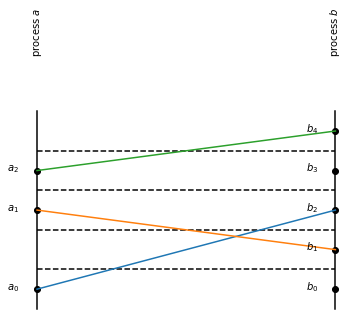

In [30]:
lamport.wind([f, g])()

Visas piesauktās darbības procesā notiek secīgi. Ja tiek definēta secībā sūtīšana un saņemšana, tad tādā secībā tās arī notiks, ja nākamajā procesā būs piesaukta šaņemšana un sūtīšana. Ja tiek vienā procesā piesaukta viena darbība, tad otrā procesā obligāti jābūt piesauktai pretdarbībai.

Piesauktās darbības strādā pēc kārtas, kā tās tika piesauktas. Ja tika piesaukta sūtīšanas funckija pirmajā procesā, otrā procesa pirmā saņemšanas funckija pieņems sūtīto ziņojumu.

Rainers Leons Justs / 181REB259 / REBC01